In [1]:
import numpy as np
import pandas as pd

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [9]:
# images should be normalized before being fed to a network for efficient training

# these are the mean and std of the data per channel
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

In [10]:
# load test data
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',download = True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [11]:
len(testloader)

157

In [12]:
images, labels = next(iter(testloader))

In [13]:
images.shape

torch.Size([64, 3, 224, 224])

In [14]:
image_id = 15

In [15]:
img = images[image_id]

In [16]:
img.shape

torch.Size([3, 224, 224])

In [17]:
# to view image we need the dimensions to be (h, w, channels)
np.transpose(img, (1,2,0)).shape

torch.Size([224, 224, 3])

### Denormaliztion
To denormalize the images for viewing, we need to multiply with the standard deviation and then add the mean.

In [18]:
arr = np.ones((5,5,3))

In [19]:
arr.shape

(5, 5, 3)

In [20]:
std = np.array([1,2,3], ndmin = 2)
mean = np.array([0.25, 0.5, 0.75], ndmin = 2)
std.shape

(1, 3)

In [21]:
'''
what would be the result of arr*std+mean?
we can see that the shapes of std and mean = (3,)
So think about how 'arr' can be even ly divided into 3 parts. 
As 'arr' has 3 channels in the third dimension, the effect will also be
in the third dimension i.e. each element in 'std' amd 'mean' will be applied
to each of the channels in the third dimension
'''
res = arr*std+mean

In [22]:
res[:,:,0]

array([[1.25, 1.25, 1.25, 1.25, 1.25],
       [1.25, 1.25, 1.25, 1.25, 1.25],
       [1.25, 1.25, 1.25, 1.25, 1.25],
       [1.25, 1.25, 1.25, 1.25, 1.25],
       [1.25, 1.25, 1.25, 1.25, 1.25]])

In [23]:
res[:,:,1]

array([[2.5, 2.5, 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, 2.5, 2.5],
       [2.5, 2.5, 2.5, 2.5, 2.5]])

In [24]:
res[:,:,2]

array([[3.75, 3.75, 3.75, 3.75, 3.75],
       [3.75, 3.75, 3.75, 3.75, 3.75],
       [3.75, 3.75, 3.75, 3.75, 3.75],
       [3.75, 3.75, 3.75, 3.75, 3.75],
       [3.75, 3.75, 3.75, 3.75, 3.75]])

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
np.transpose(images[image_id],(1,2,0)).detach().numpy()

array([[[ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        ...,
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964]],

       [[ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        ...,
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964]],

       [[ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        [ 1.3584211 ,  1.8683473 ,  1.9776908 ],
        ...,
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964],
        [-0.04580877,  0.8004202 ,  0.70535964]],

       ...,

       [[-1.6726604 ,  0.11764706, -0.30553368],
        [-1

In [27]:
img = (np.transpose(images[image_id],(1,2,0))).numpy()

In [28]:
img.shape

(224, 224, 3)

In [29]:
np.clip(img, 0, 1)

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964],
        [0.        , 0.8004202 , 0.70535964]],

       ...,

       [[0.        , 0.11764706, 0.        ],
        [0.        , 0.11764706, 0.        ],
        [0.        , 0

In [30]:
# these are the mean and std of the data per channel
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [31]:
def denormalize(tensor):
    tensor = tensor*std + mean
    return tensor

def show_img(img):
    # arrange channels
    img = img.numpy().transpose((1,2,0))
    
    # use mean and std values
    img = denormalize(img)
    
    # clip values and view image
    img = np.clip(img,0,1)
    plt.imshow(img)

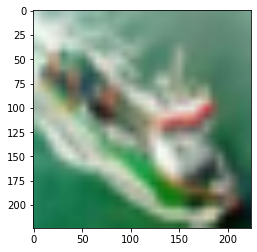

In [32]:
show_img(images[image_id])

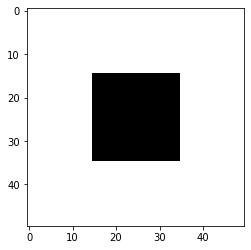

In [3]:
arr = np.ones((50, 50))
arr[15:35,15:35] = 0
plt.imshow(arr, cmap = 'gray')

In [6]:
show_img(arr)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'